<a href="https://colab.research.google.com/github/ismailerbas/Projects-in-Machine-Learning-and-AI/blob/main/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Problem


Here I use Cervical Cancer data to train decision tree model for classifying if the patients have the cancer or not. Cervical cancer is one of the most common cancers in women. Women are at risk throughout their lives. Human papillomavirus (HPV), a very common infection of the cervix, is responsible for almost all dysplasia and cancers of the cervix. Early detection is very important. According to Sobar et al. [1] cervical cancer risk can be determined based on behavior of the patients.

Setting up Libraries

In [5]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
import graphviz
import xgboost 

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

The data


In [3]:
# The dataset is taken from: https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk
df = pd.read_csv('/content/drive/My Drive/mlp/sobar.csv')

Data Analysis

In [ ]:
# We already did the Exploratory Data Analysis (EDA) in previous homework. We can see parts of that analysis below.

In [ ]:
# Here we can see a part of the data 
df.head()


,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [ ]:
# The data shape is
df.shape
# We can see that the data has 19 attributes and 72 patients 

(72, 20)

In [ ]:
# Next we check if there are NaN values in the data
df.isna().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

In [ ]:
# We can see that there are no NaN values, we can get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [ ]:
# Since we just have numerical colums we can get the statistics about the dataset
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


Data partitioning 


In [7]:
# For training data we will drop the last column which is the classification result
X = df.drop(['ca_cervix'], axis=1)
# We will assign the ca_cervix to y as our results
Y = df.ca_cervix

# Lastly we divide the dataset into train and test we divide them by 80% trainig and 20% testing. 
# In addition we can use stratify to split the dataset with the same proportions of examples in each class.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [8]:
# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

Decision tree learning


Gini index was developed by the Italian statistician Corrado Gini in 1912 [2]. Gini is widely used in statistics. The Gini index is a metric used to measure how often a randomly selected item is detected incorrectly. A feature with a low Gini index should be preferred. The high Gini index increases the homogeneity. 

The accuracy = 93.33%, train time = 0.0052 seconds.


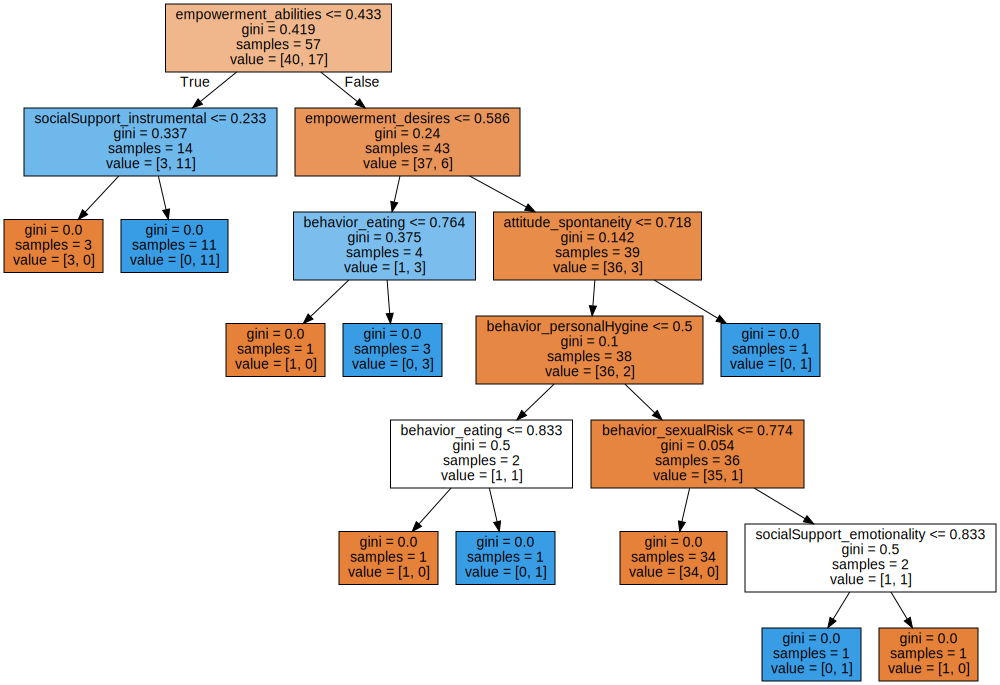

In [ ]:
# After analyzing the data, we can start implementing the decision trees and train our data with it.
tree_model = DecisionTreeClassifier() # We set up the classifier
timeStart = time.time() # we set start time to measure the time spent on training
# Train Decision Tree Classifer
tree_model = tree_model.fit(X_train,Y_train) # Training the model
timeEnd = time.time() # we set end time
prediction = tree_model.predict(X_test) # Testing the model

# DOT data
dot_data = export_graphviz(tree_model, out_file=None, 
                                feature_names=list(X),  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
# As we can see that decision tree model seperated the data very well and if we look at the terminal nodes  gini is 0,
# that means the data is well seperated. The data is very small in size so if it was bigger there would be more variance in the data, 
# that would make the splitting harder and the leaves would be much more. That can lead to more generalized model.  

In [ ]:
print('The accuracy = %0.2f%%, train time = %0.4f seconds.' % (accuracy_score(Y_test, prediction)*100, timeEnd-timeStart))


The accuracy = 93.33%, train time = 0.0052 seconds.


In [ ]:
# As we can see with default parameters our model gives a 93.33% accuracy and the model trains very fast. 
# This is a good result but it might be overfitting can be improved by changing the parameters or using more robust methods such as bagging and boosting. 

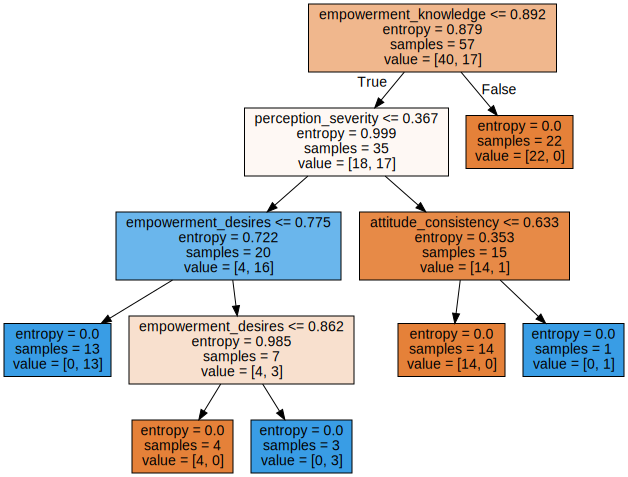

In [ ]:
# After analyzing the data, we can start implementing the decision trees and train our data with it.
tree_model = DecisionTreeClassifier(criterion="entropy") # We set up the classifier
timeStart = time.time() # we set start time to measure the time spent on training
# Train Decision Tree Classifer
tree_model = tree_model.fit(X_train,Y_train) # Training the model
timeEnd = time.time() # we set end time
prediction = tree_model.predict(X_test) # Testing the model

# DOT data
dot_data = export_graphviz(tree_model, out_file=None, 
                                feature_names=list(X),  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
print('The accuracy = %0.2f%%, train time = %0.4f seconds.' % (accuracy_score(Y_test, prediction)*100, timeEnd-timeStart))

The accuracy = 80.00%, train time = 0.0040 seconds.


In [ ]:
# When we changed the criterion from gini to entropy we can see that the accuracy got lower. Also the leafs are less in number. 
# It took the model to train faster but usually gini tends to be faster when trainig the model because the entropy makes use of logarithms. 

In [ ]:
# Next we can check the effect of number of leaf nodes to the accuracy. This is useful when we want to implement the model in a low memory chips. 
# I was using a low memory FPGA in one of my projects and controlling the maximum number of leaf node was very helpful, I was able to implement it without limitations. 
accuracy=np.zeros(10)
for i in range(2,10):
  tree_model = DecisionTreeClassifier(max_leaf_nodes=i) # We set up the classifier
  tree_model = tree_model.fit(X_train,Y_train) # Training the model
  prediction = tree_model.predict(X_test) # Testing the model
  accuracy[i]=accuracy_score(Y_test, prediction)*100

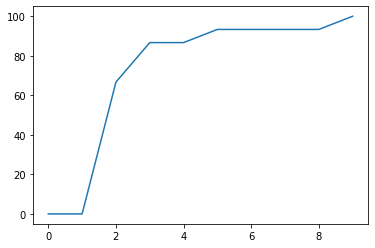

In [ ]:
plt.plot(accuracy)

In [ ]:
# We can see that the accuracy increases with the leaf node numbers. That is understandable because more leaf nodes means more seperated data. 
# However we must not forget that after some values it might overfit and might learn unnecessary details that will be bad for the generalization. 
# This can be true with the underfitting or very low accuracy when using less number of leaf nodes because the data won't seperate enough to get a good accuracy.  

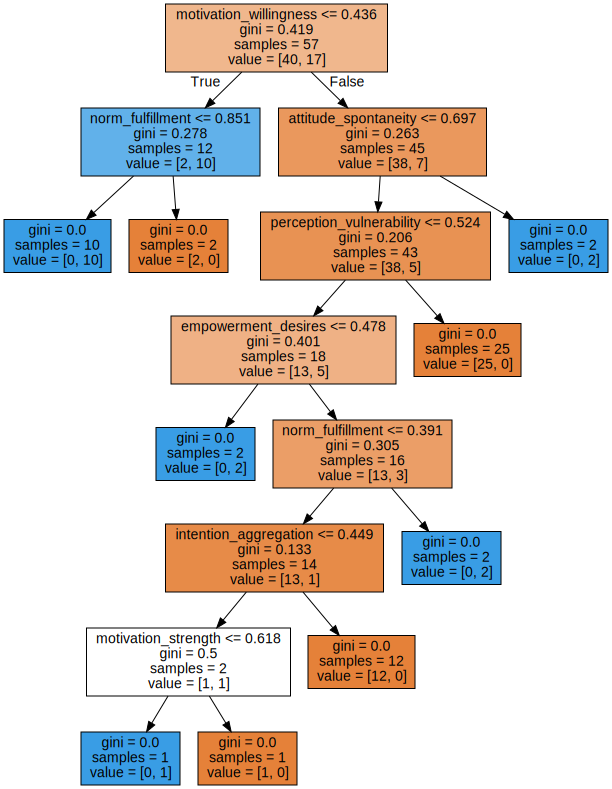

In [ ]:
# After analyzing the data, we can start implementing the decision trees and train our data with it.
tree_model = DecisionTreeClassifier(splitter="random") # We set up the classifier
timeStart = time.time() # we set start time to measure the time spent on training
# Train Decision Tree Classifer
tree_model = tree_model.fit(X_train,Y_train) # Training the model
timeEnd = time.time() # we set end time
prediction = tree_model.predict(X_test) # Testing the model

# DOT data
dot_data = export_graphviz(tree_model, out_file=None, 
                                feature_names=list(X),  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
print('The accuracy = %0.2f%%, train time = %0.4f seconds.' % (accuracy_score(Y_test, prediction)*100, timeEnd-timeStart))

The accuracy = 66.67%, train time = 0.0071 seconds.


In [ ]:
# The first two model was using best split at each node as a splitting strategy. When we change that strategy to best random split we can see that the accuracy decreases very much.
# One advantage of this randomness would be it would be less prone to overfitting.

Boosting method


In [ ]:
# For the boosting method I choose the gradient boosting clasifier and asses the accuracy, precision and f1 score with 5 fold cross validation.

In [215]:
from sklearn.metrics import accuracy_score

# Init classifier
clf = GradientBoostingClassifier(learning_rate=2)
timeStart = time.time() # we set start time to measure the time spent on training
# Fit
clf.fit(X_train, Y_train)
timeEnd = time.time() # we set end time
# Predict
preds = clf.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)


#X -the whole dataset
#y - the whole dataset but target attributes only

scores = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='accuracy', error_score='raise')

print('The mean accuracy is %.2f with standard deviation %.2f.' % (np.mean(scores)*100, np.std(scores)))
precision = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='precision', error_score='raise')

print('The mean precision is %.2f with standard deviation %.2f.' % (np.mean(precision)*100, np.std(precision)))
f1 = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='f1', error_score='raise')

print('The mean f1 score is %.2f with standard deviation %.2f.' % (np.mean(f1)*100, np.std(f1)))
print('Train time = %0.2f seconds '  % (timeEnd-timeStart))

The mean accuracy is 78.33 with standard deviation 0.09.
The mean precision is 72.07 with standard deviation 0.29.
The mean f1 score is 61.99 with standard deviation 0.21.
Train time = 0.04 seconds 


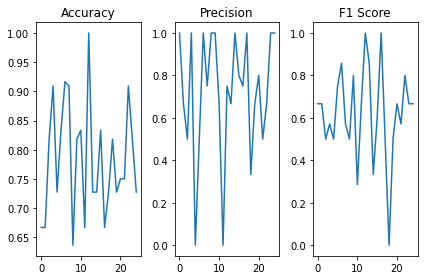

In [216]:
plt.subplot(1, 3, 1)
plt.plot(scores)
plt.title('Accuracy',fontsize=12)
plt.subplot(1, 3, 2)
plt.plot(precision)
plt.title('Precision',fontsize=12)
plt.subplot(1, 3, 3)
plt.plot(f1)
plt.title('F1 Score',fontsize=12)
plt.tight_layout()

In [ ]:
# We can see that the gradient boosting algorithm got 80% accuracy. The boosting algorithm uses 100 stages of boosting by default. 
# That might be a good method to overcome overfitting than using just one decision tree and one advantage this boosting methods brings is more robostness to the overfitting as mentioned in the sklearn guide.

In [231]:
scores= np.zeros((100,25))
precision= np.zeros((100,25))
f1= np.zeros((100,25))
times = np.zeros((100))
from sklearn.metrics import accuracy_score
for i in range(100):
  learning_rate=(0.01+(i*0.01)) # I want to see the effect of the learning rate to the accuracy and f1 score so I used a for loop to go from 0.01 to 1
  # Init classifier
  clf = GradientBoostingClassifier(learning_rate= learning_rate)
  timeStart = time.time() # we set start time to measure the time spent on training
  # Fit
  clf.fit(X_train, Y_train)
  timeEnd = time.time() # we set end time
  # Predict
  preds = clf.predict(X_test)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
  times[i] = timeEnd-timeStart

  scores[i,:] = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='accuracy', error_score='raise')
  print("The learning rate is %.2f" % (learning_rate))
  print('The mean accuracy is %.2f with standard deviation %.2f.' % (np.mean(scores[i,:])*100, np.std(scores[i,:])))
  scores[i,:] = np.mean(scores[i,:] )
  precision[i] = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='precision', error_score='raise')

  print('The mean precision is %.2f with standard deviation %.2f.' % (np.mean(precision[i,:])*100, np.std(precision[i,:])))
  precision[i] = np.mean(precision[i] )
  f1[i,:] = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='f1', error_score='raise')

  print('The mean f1 score is %.2f with standard deviation %.2f.' % (np.mean(f1[i,:])*100, np.std(f1[i,:])))
  f1[i,:] = np.mean(f1[i,:] )
  print('Train time = %0.2f seconds '  % (times[i]))

The learning rate is 0.01
The mean accuracy is 78.79 with standard deviation 0.12.
The mean precision is 75.47 with standard deviation 0.31.
The mean f1 score is 52.83 with standard deviation 0.30.
Train time = 0.06 seconds 
The learning rate is 0.02
The mean accuracy is 80.76 with standard deviation 0.11.
The mean precision is 73.53 with standard deviation 0.33.
The mean f1 score is 57.30 with standard deviation 0.25.
Train time = 0.06 seconds 
The learning rate is 0.03
The mean accuracy is 83.88 with standard deviation 0.11.
The mean precision is 74.60 with standard deviation 0.29.
The mean f1 score is 59.49 with standard deviation 0.25.
Train time = 0.06 seconds 
The learning rate is 0.04
The mean accuracy is 82.85 with standard deviation 0.13.
The mean precision is 76.87 with standard deviation 0.25.
The mean f1 score is 61.65 with standard deviation 0.31.
Train time = 0.06 seconds 
The learning rate is 0.05
The mean accuracy is 82.52 with standard deviation 0.11.
The mean precisio

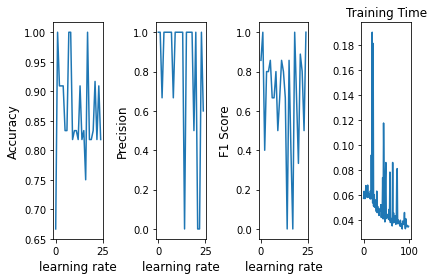

In [238]:
plt.subplot(1, 4, 1)
plt.plot(scores)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('learning rate',fontsize=12)
plt.subplot(1, 4, 2)
plt.plot(precision)
plt.ylabel('Precision',fontsize=12)
plt.xlabel('learning rate',fontsize=12)
plt.subplot(1, 4, 3)
plt.plot(f1)
plt.ylabel('F1 Score',fontsize=12)
plt.xlabel('learning rate',fontsize=12)
plt.subplot(1, 4, 4)
plt.plot(times)
plt.title('Training Time',fontsize=12)

plt.tight_layout()

In [ ]:
# Above we see the effect of the learning rate to the model learning performance and the effect on the accuracy, precision and f1 score. 
# We can see that higher learning rate, the lower the training time. That is because with the lower learning rate the model learns slower. 

Bagging Trees


In [233]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf = ExtraTreesClassifier(n_estimators=10, criterion="gini") # We choose gini and we will compare the results with the entropy next
timeStart = time.time() # we set start time to measure the time spent on training
clf.fit(X_train, Y_train)
timeEnd = time.time() # we set end time
preds =clf.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='accuracy', error_score='raise')

print('The mean accuracy is %.2f with standard deviation %.2f.' % (np.mean(scores)*100, np.std(scores)))
precision = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='precision', error_score='raise')

print('The mean precision is %.2f with standard deviation %.2f.' % (np.mean(precision)*100, np.std(precision)))
f1 = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='f1', error_score='raise')

print('The mean f1 score is %.2f with standard deviation %.2f.' % (np.mean(f1)*100, np.std(f1)))
print('Train time = %0.2f seconds '  % (timeEnd-timeStart))

The mean accuracy is 88.15 with standard deviation 0.08.
The mean precision is 88.33 with standard deviation 0.20.
The mean f1 score is 73.16 with standard deviation 0.21.
Train time = 0.02 seconds 


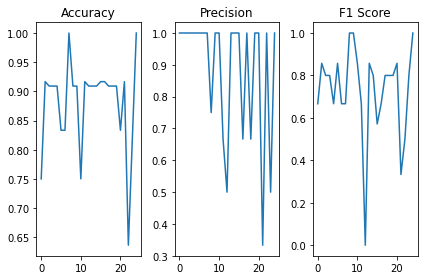

In [234]:
plt.subplot(1, 3, 1)
plt.plot(scores)
plt.title('Accuracy',fontsize=12)
plt.subplot(1, 3, 2)
plt.plot(precision)
plt.title('Precision',fontsize=12)
plt.subplot(1, 3, 3)
plt.plot(f1)
plt.title('F1 Score',fontsize=12)
plt.tight_layout()

In [ ]:
# Next we use a bagging tree algorithm called Extremely Randomized Trees Classifier. We can see that mean accuracy is 86% which is better than the boosting method. 
# In Extra Trees, the split criteria is random as we saw above and it splits from all of the observations. That helps the model to be random and increase the robustness for the overfitting.

In [235]:
clf = ExtraTreesClassifier(n_estimators=10, criterion="entropy") # we now choose entropy for the criterion and we will compare the results with gini
timeStart = time.time() # we set start time to measure the time spent on training
clf.fit(X_train, Y_train)
timeEnd = time.time() # we set end time
preds =clf.predict(X_test)
scores = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='accuracy', error_score='raise')

print('The mean accuracy is %.2f with standard deviation %.2f.' % (np.mean(scores)*100, np.std(scores)))
precision = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='precision', error_score='raise')

print('The mean precision is %.2f with standard deviation %.2f.' % (np.mean(precision)*100, np.std(precision)))
f1 = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='f1', error_score='raise')

print('The mean f1 score is %.2f with standard deviation %.2f.' % (np.mean(f1)*100, np.std(f1)))
print('Train time = %0.2f seconds '  % (timeEnd-timeStart))

The mean accuracy is 86.42 with standard deviation 0.08.
The mean precision is 81.73 with standard deviation 0.33.
The mean f1 score is 67.14 with standard deviation 0.27.
Train time = 0.01 seconds 


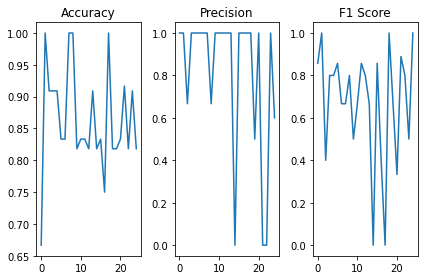

In [236]:
plt.subplot(1, 3, 1)
plt.plot(scores)
plt.title('Accuracy',fontsize=12)
plt.subplot(1, 3, 2)
plt.plot(precision)
plt.title('Precision',fontsize=12)
plt.subplot(1, 3, 3)
plt.plot(f1)
plt.title('F1 Score',fontsize=12)
plt.tight_layout()

In [ ]:
# We can see that when we use the entropy for the criterion we get less accuracy for the model. It is faster in terms of training time. The f1 score and precision also confirm it because they are decreased too.
# For both, the model uses 10 trees and below we will see the effects of changing the number of trees to the accuracy, precision and f1 score. 

In [9]:
scores= np.zeros((100,25))
precision= np.zeros((100,25))
f1= np.zeros((100,25))
times = np.zeros((100))
from sklearn.metrics import accuracy_score
for i in range(100):
  n_estimators=(1+(i))
  # Init classifier
  clf = ExtraTreesClassifier(n_estimators=n_estimators, criterion="gini")
  timeStart = time.time() # we set start time to measure the time spent on training
  # Fit
  clf.fit(X_train, Y_train)
  timeEnd = time.time() # we set end time
  # Predict
  preds = clf.predict(X_test)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
  times[i] = timeEnd-timeStart

  scores[i,:] = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='accuracy', error_score='raise')
  print("The estimator size is %.2f" % (n_estimators))
  print('The mean accuracy is %.2f with standard deviation %.2f.' % (np.mean(scores[i,:])*100, np.std(scores[i,:])))
  scores[i,:] = np.mean(scores[i,:] )
  precision[i] = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='precision', error_score='raise')

  print('The mean precision is %.2f with standard deviation %.2f.' % (np.mean(precision[i,:])*100, np.std(precision[i,:])))
  precision[i] = np.mean(precision[i] )
  f1[i,:] = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='f1', error_score='raise')

  print('The mean f1 score is %.2f with standard deviation %.2f.' % (np.mean(f1[i,:])*100, np.std(f1[i,:])))
  f1[i,:] = np.mean(f1[i,:] )
  print('Train time = %0.2f seconds '  % (times[i]))


The estimator size is 1.00
The mean accuracy is 80.21 with standard deviation 0.12.
The mean precision is 67.85 with standard deviation 0.28.
The mean f1 score is 66.50 with standard deviation 0.19.
Train time = 0.01 seconds 
The estimator size is 2.00
The mean accuracy is 82.12 with standard deviation 0.09.
The mean precision is 69.33 with standard deviation 0.40.
The mean f1 score is 52.55 with standard deviation 0.28.
Train time = 0.00 seconds 
The estimator size is 3.00
The mean accuracy is 85.03 with standard deviation 0.10.
The mean precision is 83.27 with standard deviation 0.20.
The mean f1 score is 74.80 with standard deviation 0.18.
Train time = 0.01 seconds 
The estimator size is 4.00
The mean accuracy is 87.06 with standard deviation 0.08.
The mean precision is 85.33 with standard deviation 0.33.
The mean f1 score is 60.54 with standard deviation 0.23.
Train time = 0.01 seconds 
The estimator size is 5.00
The mean accuracy is 84.85 with standard deviation 0.11.
The mean pre

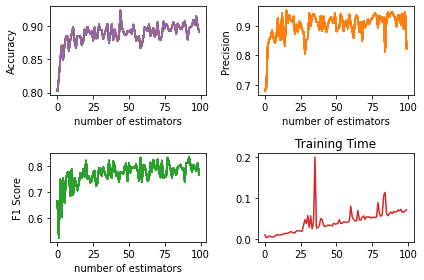

In [22]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(scores)
axs[0, 0].set(xlabel='number of estimators', ylabel='Accuracy')
axs[0, 1].plot(precision, 'tab:orange')
axs[0, 1].set(xlabel='number of estimators', ylabel='Precision')
axs[1, 0].plot(f1, 'tab:green')
axs[1, 0].set(xlabel='number of estimators', ylabel='F1 Score')
axs[1, 1].plot(times, 'tab:red')
axs[1, 1].set_title('Training Time')
plt.tight_layout()

In [25]:
# As we can see here number of the trees affect directly the accuracy of the model . As the estimators increase our accuracy and other metrics too. 
# That is a good representation of the power of the bagging methods to increase accuracy, help to the generalization and while doing that avoid overfitting. 
# However there is one problem that arises is, the time that takes the model to train increases as the estimators increase. 
# That is ok with my data which is very small compared to some big data that has alot of features or the data. 
# That might take much more time to train the network especially with a laptop or a computer with relatively bad hardware. 
# We can see that after some time and estimator size the mean of the curve stabilizes and that might indicate that the model seperated the data well.


For the comparision I choose mainly accuracy to compare the results and also I used precision and f1 score because, one of the biggest mistakes in studies using classification algorithms is to look only at the accuracy rate as a success criterion. Especially in unbalanced data sets, the accuracy rate does not give us accurate information. 
The precision value is especially important when the cost of false-positive estimation is high. For example, marking healthy people as cancerous. In this case, high precision value is an important criterion for model selection for us.
The reason for using F1 Score value is not to make an incorrect model selection in unevenly distributed data sets, which is the case in our dataset. In addition, F1 Score is very important to us as we need a measurement metric that will include not only false negative or false positive but also all error costs. The higher the F1 score of a model, the higher the success rate of the model.

When we compare three models above we can see that decision tree algorithm got 93% accuracy, but we must not forget that it was most probably overfitted. Because of the overfitting problem bagging and boosting algorithms are a perfect solution. They got good results and by changing the parameters we can see that we can optimize the metrics as shown above. We can see that bagging algorithm was slightly better than the boosting algorithm. Thats because each models are independent in bagging models and they are not affected by the performance of the previous model and their aim is to reduce variance [3]. 

[1] https://doi.org/10.1166/asl.2016.7980

[2] Variabilità e mutabilità: contributo allo studio delle distribuzioni e delle relazioni statistiche.

[3] https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/